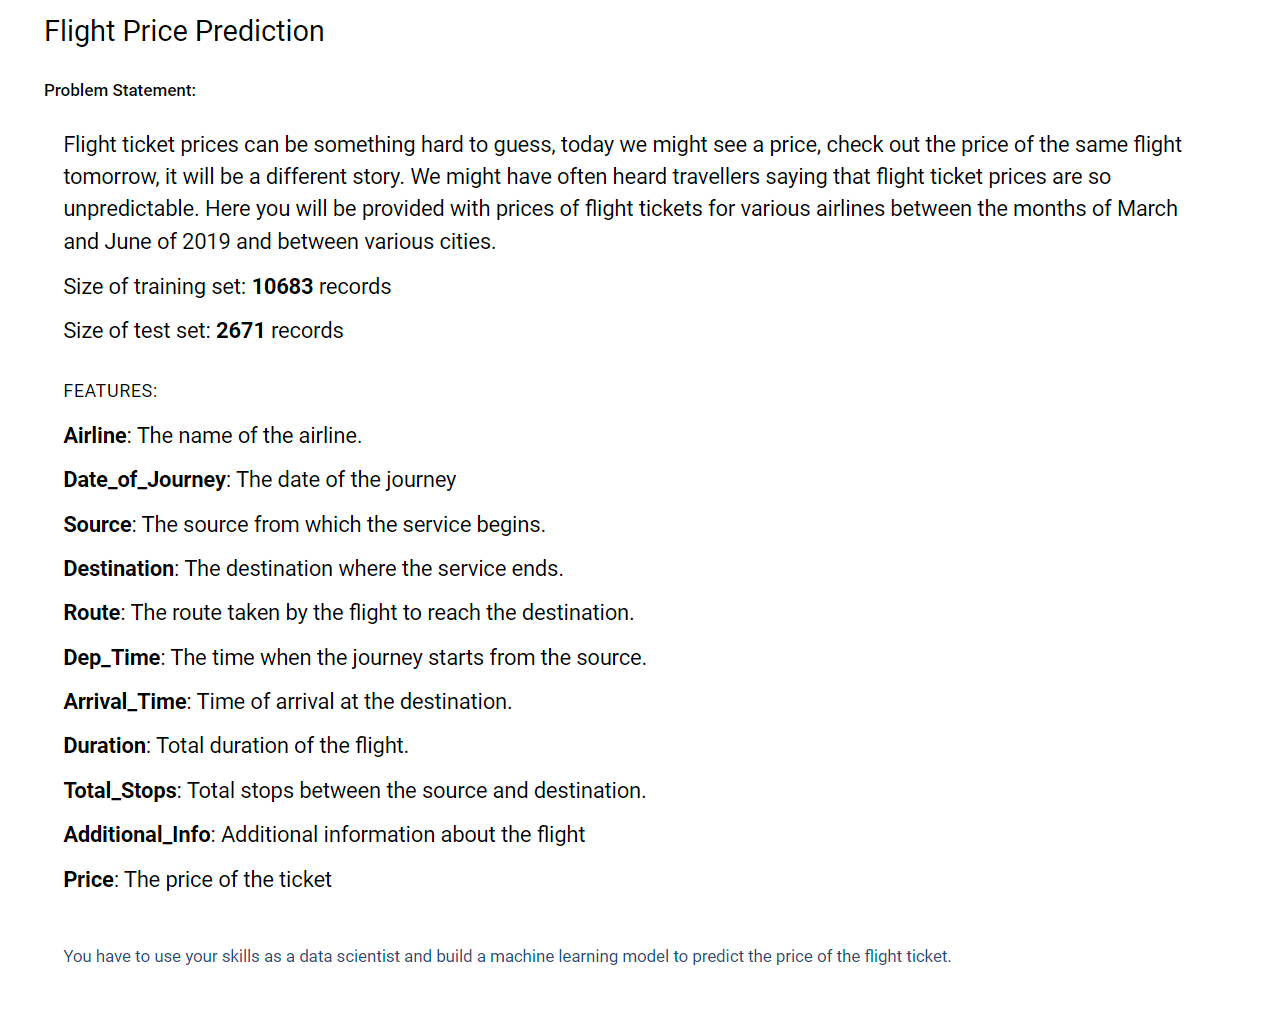

In [4]:
# importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("Flight_Data_Train.xlsx")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.shape

(10683, 11)

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Observation

this dataset has 10683 rows and 11 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Observation

We have Object and Integer data

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [8]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [10]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [11]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [14]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# observaton

'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet' are the airlines

'No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover' are the additional info mentioned

# null value check

<AxesSubplot:>

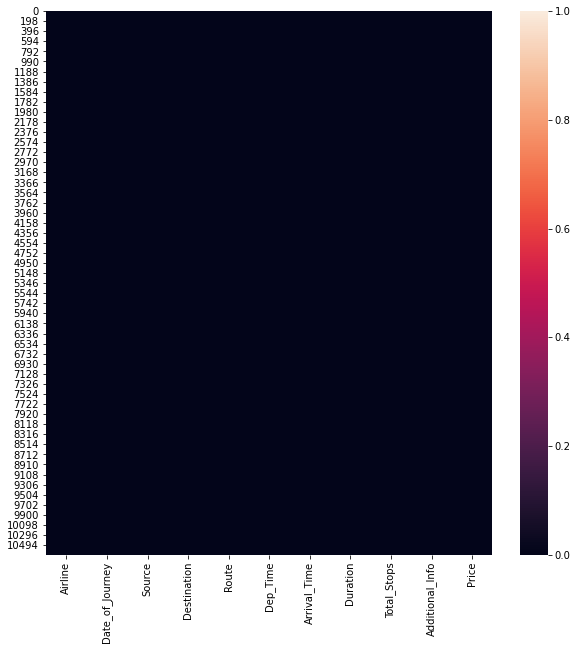

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [17]:
df.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

# observation

We have null values so we will Treat them

# null value treatment

I am using Simple Imputer to treat Null values

In [6]:
from sklearn.impute import SimpleImputer
categorical=['Route','Total_Stops']

In [7]:
siii = SimpleImputer(strategy= "most_frequent")
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# observation

null values are treated using simple imputer

# univariate analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

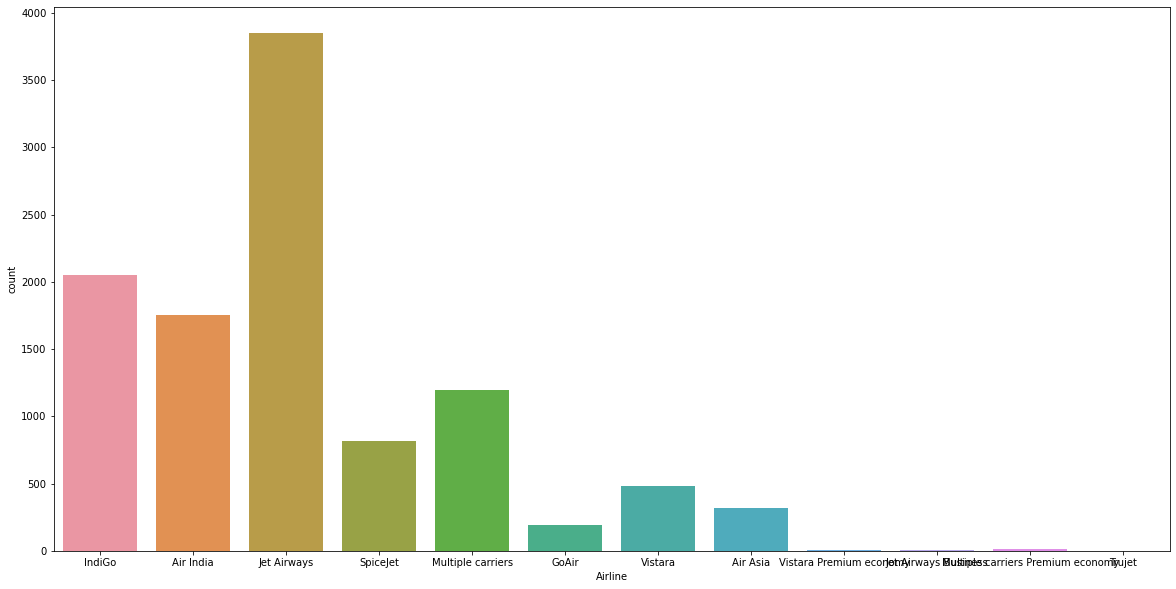

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(df['Airline'])


# observation

Jet Airways data is higher

<AxesSubplot:xlabel='Source', ylabel='count'>

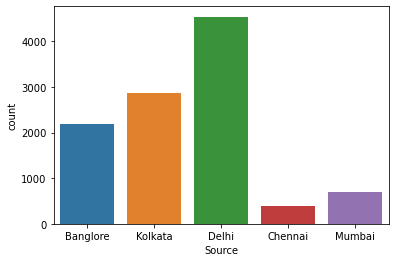

In [21]:
sns.countplot(df['Source'])

# observation

Flights start from Delhi is high compared to others

<AxesSubplot:xlabel='Destination', ylabel='count'>

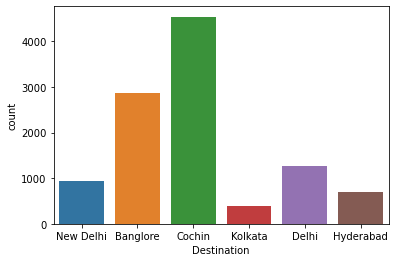

In [22]:
sns.countplot(df['Destination'])

# observation

Cochin has higher arrival of flights 

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

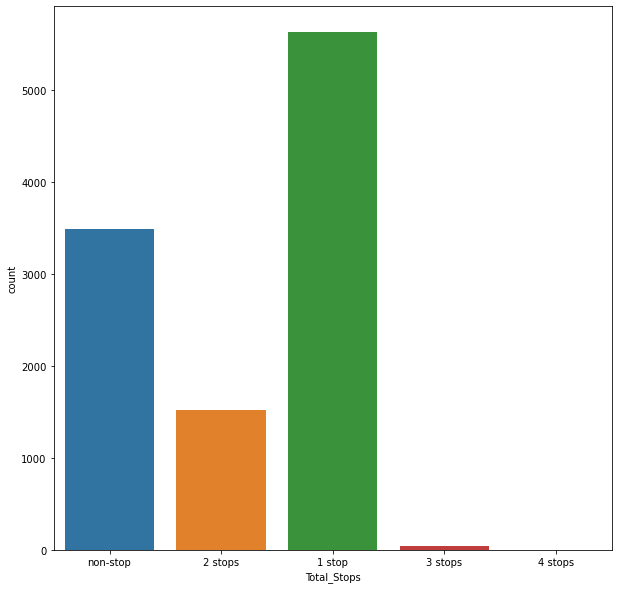

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df['Total_Stops'])

# observation

1 Stop are higher compared to others

<AxesSubplot:xlabel='Price', ylabel='Density'>

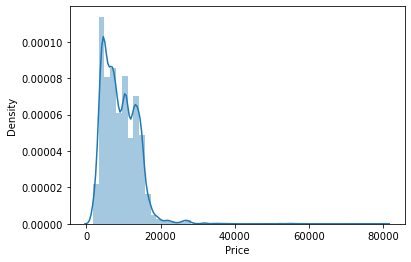

In [25]:
sns.distplot(df['Price'])

# observation

Price is between 0 to 20000 most

# observation

longitude is positively skewed

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

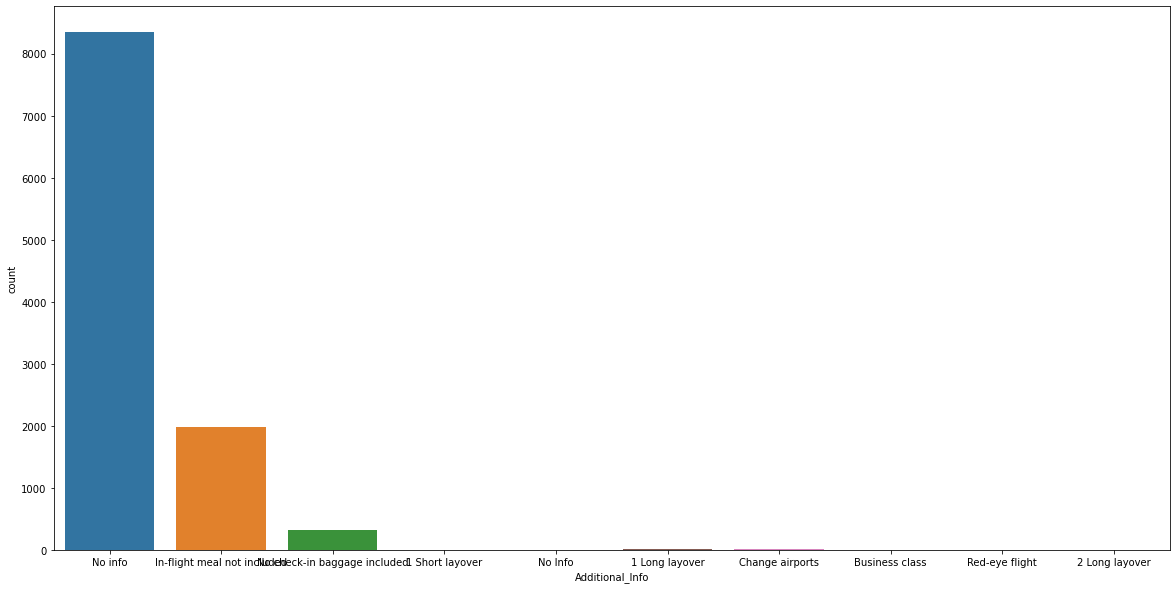

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(df['Additional_Info'])


# observation



No info is higher compared to other additional info

# Bivariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

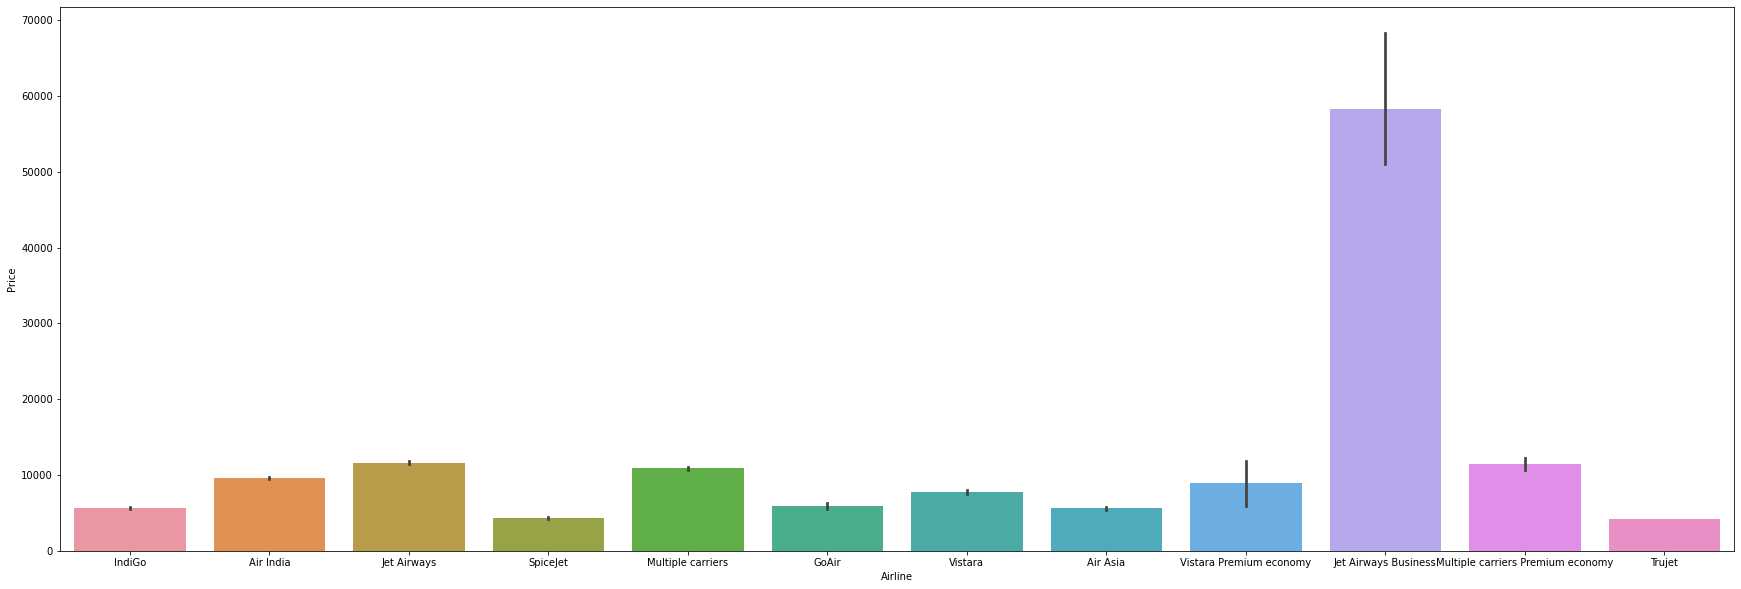

In [39]:
plt.figure(figsize=(30,10))
sns.barplot(df['Airline'],df['Price'])

# Observation

Jet Airways bussiness price is higher compared to others . it makes sense buisness class is higher price

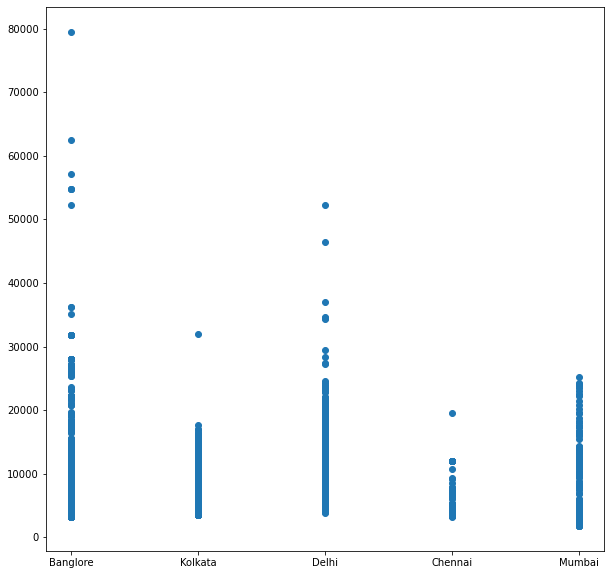

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(df['Source'],df['Price'])

<AxesSubplot:xlabel='Source', ylabel='Price'>

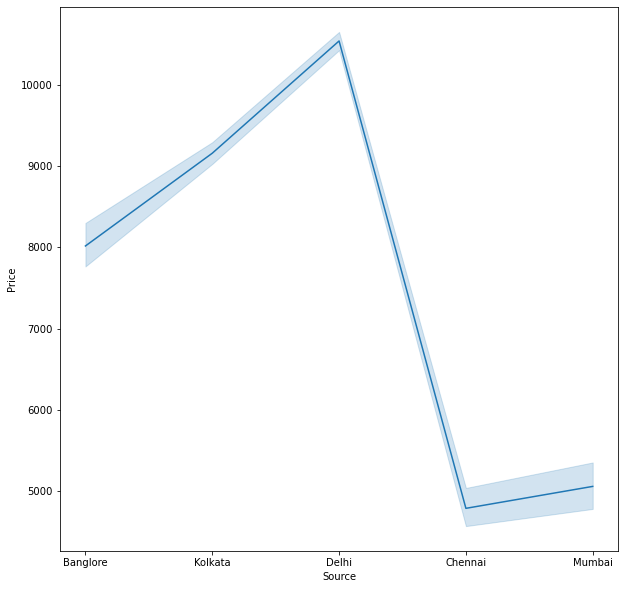

In [41]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Source'],df['Price'])

# Observation

Flights Price is higher starting from banglore

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

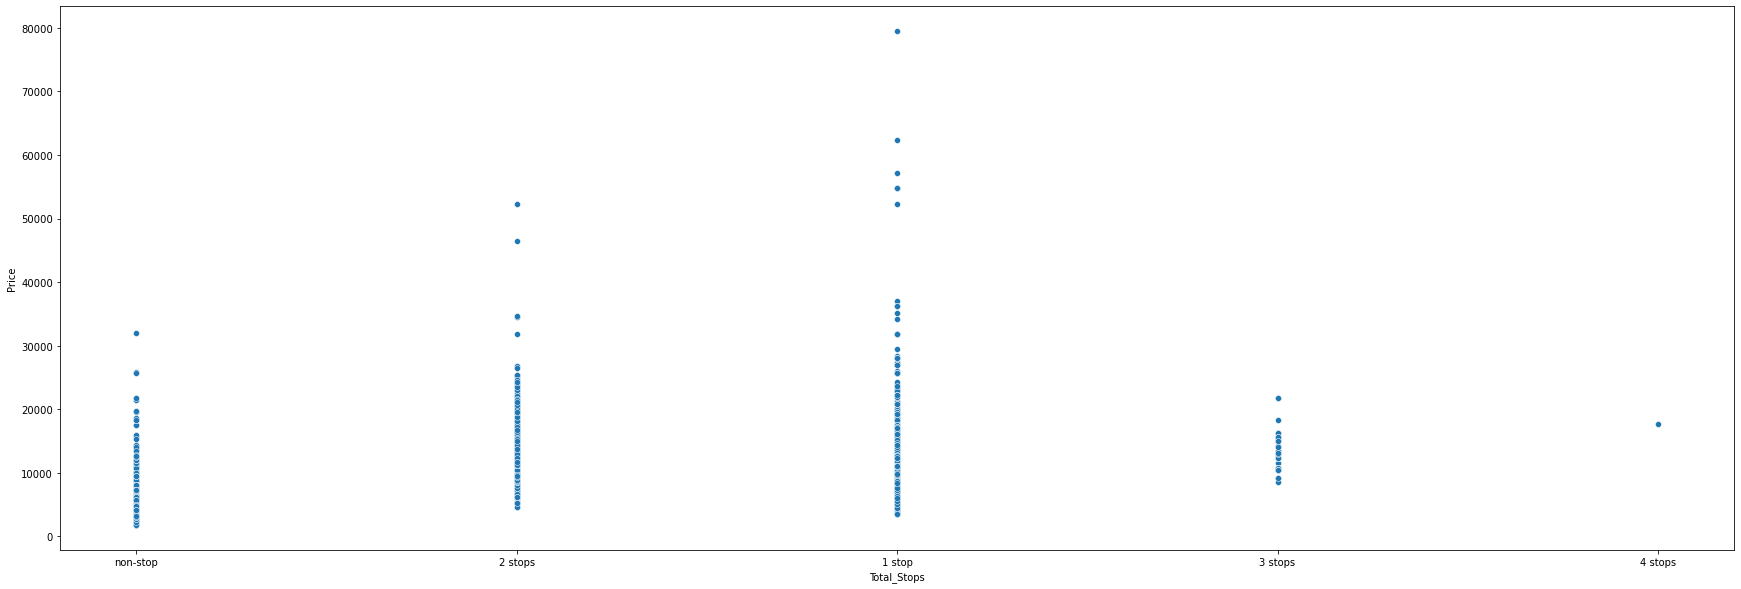

In [45]:
plt.figure(figsize=(30,10))
sns.scatterplot(df['Total_Stops'],df['Price'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

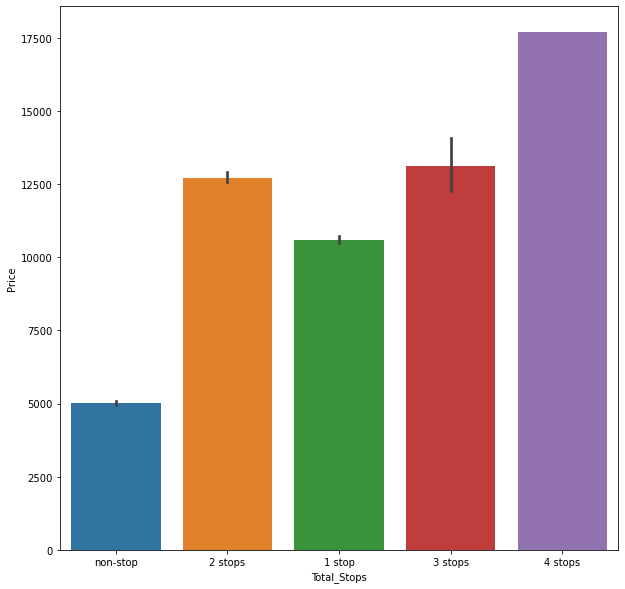

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(df['Total_Stops'],df['Price'])

# observations

Price of 4 Stops is higher compared to others

<AxesSubplot:xlabel='Destination', ylabel='Price'>

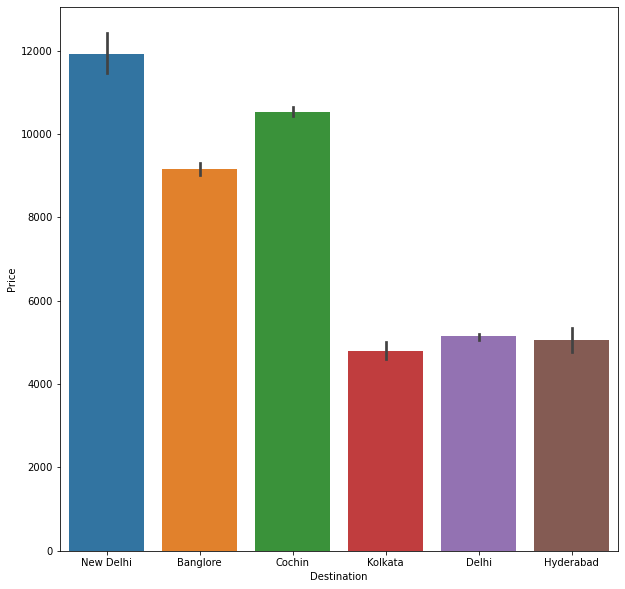

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(df['Destination'],df['Price'])

<AxesSubplot:xlabel='Destination', ylabel='Price'>

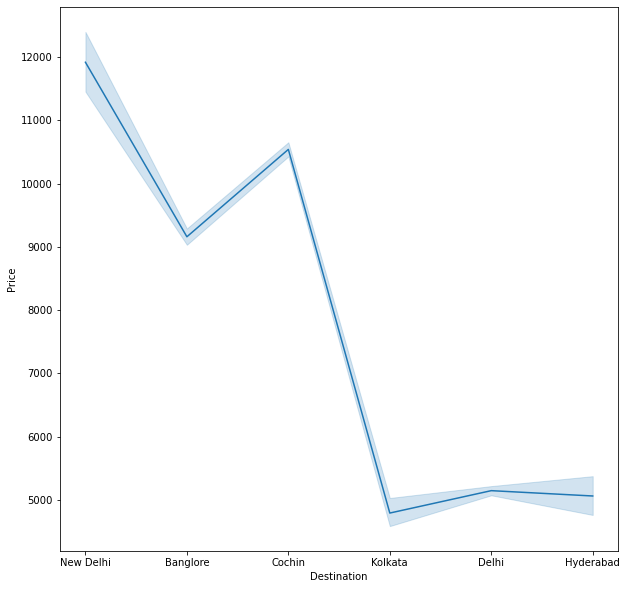

In [51]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Destination'],df['Price'])

# Observation

FLights arrival at New delhi is higher price compared to others

<AxesSubplot:xlabel='Airline', ylabel='Source'>

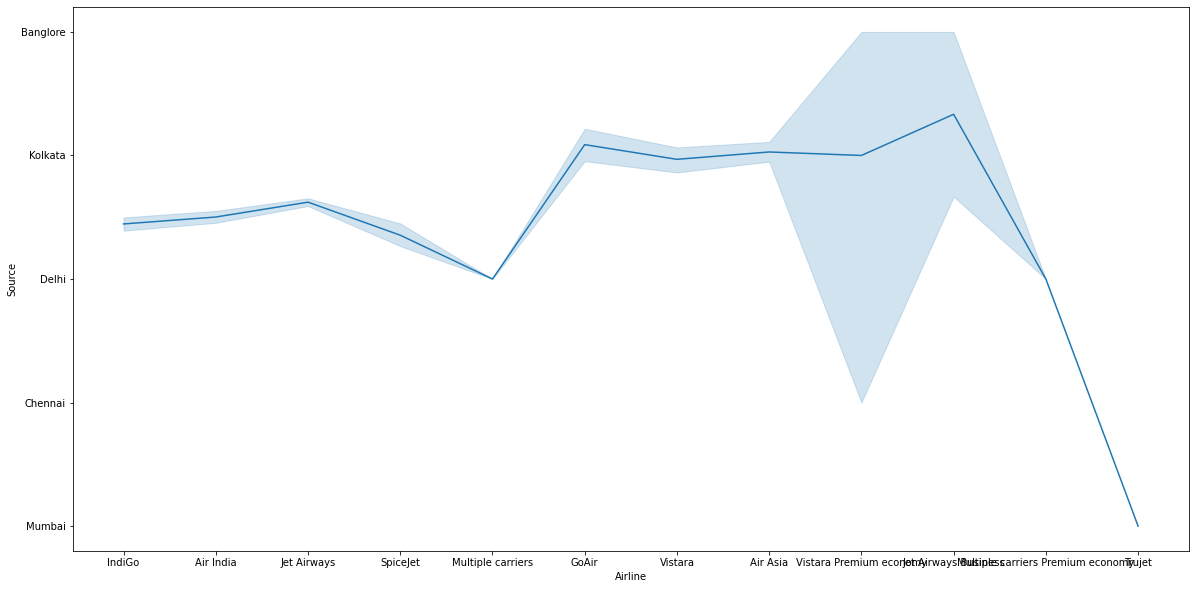

In [56]:
plt.figure(figsize=(20,10))
sns.lineplot(df['Airline'],df['Source'])

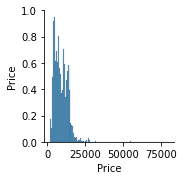

In [57]:
sns.pairplot(df)

# Encoding

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Observation

now i need to encode categorical data

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
a = pd.get_dummies(df["Airline"]).astype(int)
b = pd.get_dummies(df["Destination"],prefix="destination").astype(int)
c = pd.get_dummies(df["Additional_Info"]).astype(int)
d = pd.get_dummies(df["Source"]).astype(int)

# Using pd.get_dummies as data are not ordinal in nature

In [10]:
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [11]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [12]:
df["Dep_hours"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [13]:
df["Dep_minutes"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [14]:
df["Arrival_hours"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [15]:
df["Arrival_minutes"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Seperating day month  , hours and minutes

In [16]:
dur = list(df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:   
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"  
        else:
            dur[i] = "0h " + dur[i]         



In [17]:
duration_hours = []
duration_mins = []


In [18]:
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))  
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   

In [19]:
df["Duration_hours"] = duration_hours
df["Duration_minutes"] = duration_mins

# Observation

# Spliting duration into hours and minutes

In [20]:
df["Total_Stops"]  = df["Total_Stops"].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [ ]:
df.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Airline","Source","Destination","Additional_Info"],inplace=True,axis=1)

In [24]:
# joining dummies to dataframe
df_new=df.join(a).join(b).join(c).join(d)

In [25]:
# dropping Route as it does not give any significance to dataset
df_new.drop("Route",inplace=True,axis=1)

In [26]:
df_new.dtypes

Total_Stops                          int64
Price                                int64
Journey_day                          int64
Journey_month                        int64
Dep_hours                            int64
Dep_minutes                          int64
Arrival_hours                        int64
Arrival_minutes                      int64
Duration_hours                       int64
Duration_minutes                     int64
Air Asia                             int32
Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Trujet                               int32
Vistara                              int32
Vistara Premium economy              int32
destination_Banglore                 int32
destination

# Observation

we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

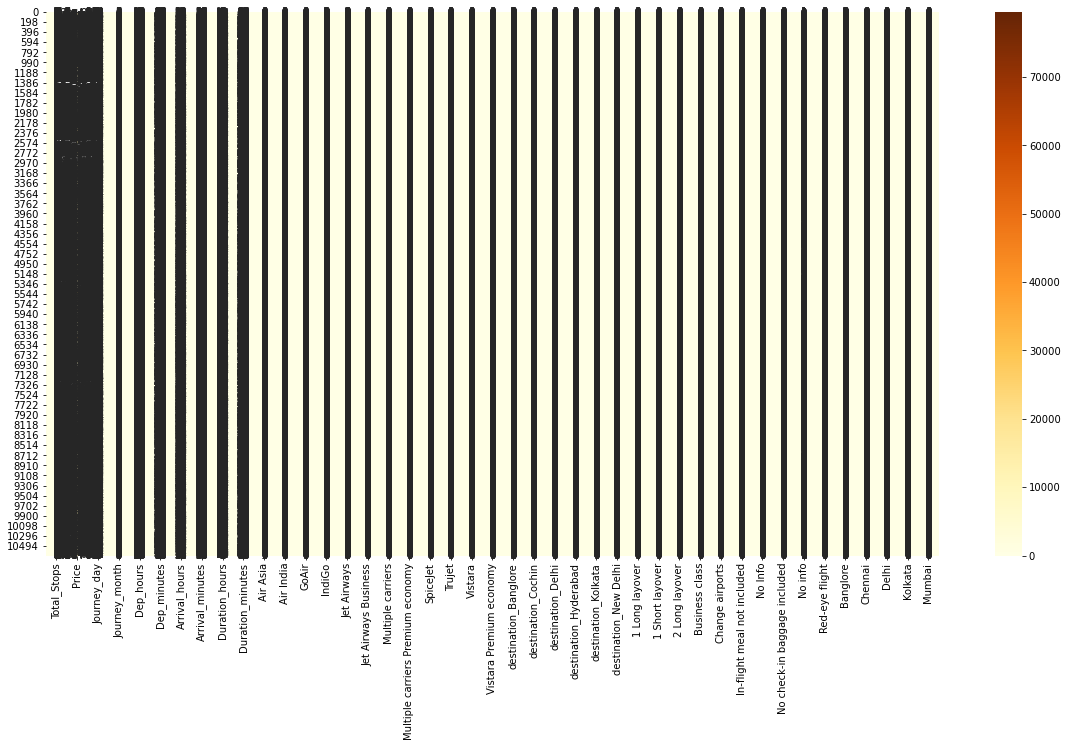

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new,annot=True,cmap="YlOrBr")

In [34]:
df_new.corr()["Price"].sort_values(ascending=False)

Price                                1.000000
Total_Stops                          0.603883
Duration_hours                       0.508672
Jet Airways                          0.416135
destination_Cochin                   0.270619
Delhi                                0.270619
Jet Airways Business                 0.253302
Business class                       0.200306
destination_New Delhi                0.189785
Multiple carriers                    0.139803
1 Long layover                       0.119208
Air India                            0.050346
Change airports                      0.042835
In-flight meal not included          0.039825
1 Short layover                      0.037047
2 Long layover                       0.036495
Arrival_hours                        0.024264
No info                              0.022230
Multiple carriers Premium economy    0.017651
Kolkata                              0.009377
destination_Banglore                 0.009377
Dep_hours                         

# observation

Total Stops , Duration , Jet Airways, Delhi,cochin are positvely correlated with price

Indigo,delhi,sicejet are negatively correlated with price

# PCA 

# Principal component analysis as no of columns are higher

In [24]:
df_new.drop(["Price"],axis=1,inplace=True)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=35)
dfi=pca.fit_transform(df_new)

In [27]:
df_new = pd.DataFrame(dfi)

In [28]:
df_new.shape

(10683, 35)

# Multicolinearity Checking

# variance inflation factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(df_new.values,a) for a in range(35)]
vif["feature names"] = df_new.columns

In [31]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
27,1.0,27
12,1.0,12
15,1.0,15
22,1.0,22
19,1.0,19
32,1.0,32
3,1.0,3
33,1.0,33
30,1.0,30
29,1.0,29


# observaiton

No multicolinearity observed as PCA takes care of multicolinearity

In [ ]:
x_final = df_new
y = df["Price"]

# model Training starts

# Importing required libraries

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [34]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   

the best random state is 45 and best accuracy is 0.7070540956678473 for LinearRegression()
the training score is 0.7070540956678473 the testing score is -1.587517477604095e+19 the cross val score is -5.265422728655392e+18 for LinearRegression()
the best random state is 34 and best accuracy is 0.9969240979780951 for DecisionTreeRegressor()
the training score is 0.9969240979780951 the testing score is 0.7215274887661574 the cross val score is 0.7307877480600805 for DecisionTreeRegressor()
the best random state is 45 and best accuracy is 0.7057878672243272 for Ridge()
the training score is 0.7057878672243272 the testing score is 0.6351544717208144 the cross val score is 0.6866443492368569 for Ridge()
the best random state is 45 and best accuracy is 0.7057536153860664 for Lasso()
the training score is 0.7057536153860664 the testing score is 0.6322081956241656 the cross val score is 0.6865310649718493 for Lasso()
the best random state is 27 and best accuracy is 0.7619418451958966 for KNeigh

In [35]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
5,"(DecisionTreeRegressor(max_features='auto', ra...",0.977719,8.264145e-01,8.556740e-01
1,DecisionTreeRegressor(),0.996924,7.215275e-01,7.307877e-01
2,Ridge(),0.705788,6.351545e-01,6.866443e-01
3,Lasso(),0.705754,6.322082e-01,6.865311e-01
4,KNeighborsRegressor(),0.761942,5.460234e-01,5.967324e-01
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.493313,4.096368e-01,2.455884e-01
0,LinearRegression(),0.707054,-1.587517e+19,-5.265423e+18


In [36]:
final_result.loc[5]["Model Name"]

RandomForestRegressor()

# running Support vector classifier induvidually as it consumes more memory

In [59]:
svr = SVR()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svr.fit(train_x,train_y)
trs = al.score(train_x,train_y)
tss = al.score(test_x,test_y)
cvs = cross_val_score(svr,x_final,y,cv=KFold(5)).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}') 

the training score is 0.5384684550444383 the testing score is 0.48876038099287555 the cross val score is 0.003423197264494515 for AdaBoostRegressor()


# Observation

from all the classifier models random forest performed best with accuracy of 97 % and cross val score of 82 %

# HyperParameter Tunining

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
rf = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=16)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]})

In [40]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 100}

# using the best parameters got in grid search 

In [42]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=16)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 0.9876276368138521 the testing score is 0.8396952140170783 the cross val score is 0.8648762302378163
Mean Squared Error 3373180.8448064136
Mean Absolute Error 911.5653860469952
Root Mean Squared Error 1836.6221290201242
R2 Score 0.8396952140170783


# Observation

# The Training score is 98% , Testing Score 83% and Cross val score is 86%

# saving the model

In [43]:
import joblib
joblib.dump(rf,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

# Now using the test data set to predict

# doing all the feature engineering techniques we did on train dataset on this dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Flight_Test_set.xlsx")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


<AxesSubplot:>

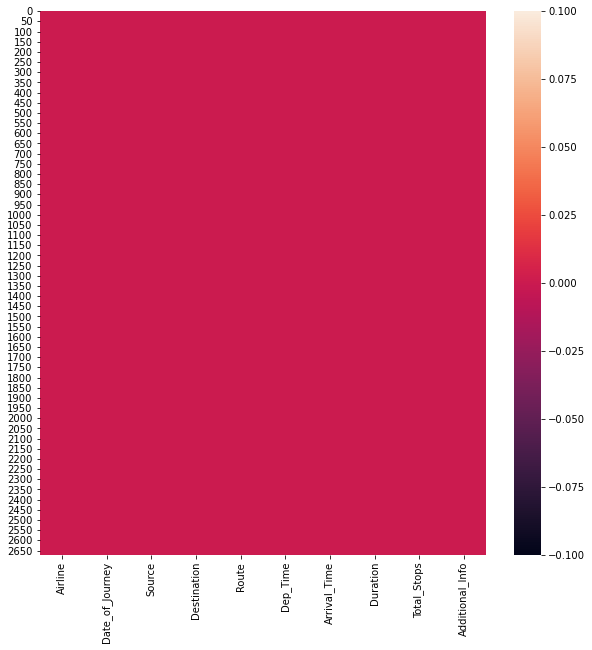

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [47]:
df.isnull().sum().sort_values(ascending=False)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
categorical=['Route','Total_Stops']

In [5]:
siii = SimpleImputer(strategy= "most_frequent")
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Encoding

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [8]:
a = pd.get_dummies(df["Airline"]).astype(int)
b = pd.get_dummies(df["Destination"],prefix="destination").astype(int)
c = pd.get_dummies(df["Additional_Info"]).astype(int)
d = pd.get_dummies(df["Source"]).astype(int)

df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

df["Dep_hours"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_minutes"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_hours"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

df["Arrival_minutes"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

dur = list(df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:   
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"  
        else:
            dur[i] = "0h " + dur[i]         



duration_hours = []
duration_mins = []


for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))  
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   

df["Duration_hours"] = duration_hours
df["Duration_minutes"] = duration_mins

df["Total_Stops"]  = df["Total_Stops"].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

df.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Airline","Source","Destination","Additional_Info"],inplace=True,axis=1)

df_new=df.join(a).join(b).join(c).join(d)

df_new.drop("Route",inplace=True,axis=1)

df_new.dtypes

Total_Stops                          int64
Journey_day                          int64
Journey_month                        int64
Dep_hours                            int64
Dep_minutes                          int64
Arrival_hours                        int64
Arrival_minutes                      int64
Duration_hours                       int64
Duration_minutes                     int64
Air Asia                             int32
Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Vistara                              int32
Vistara Premium economy              int32
destination_Banglore                 int32
destination_Cochin                   int32
destination_Delhi                    int32
destination

# PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
p = pca.fit_transform(df_new)
df_n = pd.DataFrame(p)
df_n.shape

(2671, 35)

In [13]:
# Multicolinearity Checking

# variance inflation factor

df_new.shape

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(df_n.values,a) for a in range(35)]
vif["feature names"] = df_n.columns

vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,1.0,4
0,1.0,0
14,1.0,14
31,1.0,31
26,1.0,26
24,1.0,24
22,1.0,22
18,1.0,18
34,1.0,34
9,1.0,9


In [14]:
import joblib

In [15]:
model = joblib.load("FlightPricePrediction.pkl")

In [17]:
pred = model.predict(df_n)

In [18]:
prediction = pd.DataFrame(pred)

In [19]:
prediction.to_csv("Flight Price Prediciton.csv")